<a href="https://colab.research.google.com/github/bindukovvada/HEALTH-INSURANCE-CROSS-SELL-PREDICTION/blob/main/Bindu_HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

#Importing the libraries


In [115]:
!pip install pandas-profiling==2.7.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install scikit-optimize 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 4.2 MB/s 


In [113]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBRFClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as ltb

from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV
import time
from math import sqrt
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, roc_auc_score, classification_report
from skopt.space import Real, Categorical, Integer

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Load the Dataset

In [124]:
df = pd.read_csv('/content/drive/MyDrive/Copy of TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

#Data Inspection

In [126]:
#Copying the dataset
data = df.copy()

In [7]:
#Showing first 5 rows
data.head()


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [9]:
#Showing Last 5 rows
data.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [10]:
#Finding the size of the dataset
data.shape

(381109, 12)

Dataset has 381109 rows and 12 columns. It has no missing values.

In [127]:
#Check datatype and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


Observation-

The dataset has 3 different dtype kinds. They are object, int, and float. There are 3 categorical features and the rest are numerical. 

In [12]:
#Finding the sum of null values
data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

No null values found in this dataset.

In [117]:
#checking unique values of each features
data.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

Observation - 

*   We may remove the Id column because the values in it are all unique.
*   We can encode the Age, Driving License, Previously Insured, Vehicle Age, and Vehicle Damage columns because they only have two unique values.

In [14]:
#Finding Duplicate values
len(data[data.duplicated()])

0

No Duplicate Values found

#Descriptive Statistics

In [118]:
#checking columns of data
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

##Checking the statistics of our data like mean, standard deviation and so on..

To learn more about the dataset features, w e're using the df.describe() function, which provides statistical data on all numerical features of our data frame by default.

In [15]:
data.describe(include='all')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109,381109.000000,381109.000000,381109.000000,381109.000000,381109,381109,381109.000000,381109.000000,381109.000000,381109.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN,NaN
freq,NaN,206089,NaN,NaN,NaN,NaN,200316,192413,NaN,NaN,NaN,NaN
mean,190555.000000,NaN,38.822584,0.997869,26.388807,0.458210,NaN,NaN,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,NaN,15.511611,0.046110,13.229888,0.498251,NaN,NaN,17213.155057,54.203995,83.671304,0.327936
min,1.000000,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39400.000000,152.000000,227.000000,0.000000


##From the statistical part of our data, we can see:

*   We can observe from the age feature that the oldest insured client is 85 and the youngest is 20. There are several outliers in terms of age distributions.
*   The customer has a maximum of 299 days, a minimum of 10, and an average of 154 days associated with the company.
*   The maximum premium a client must pay in a year is $5,40,165 and the minimum premium is $2630, we may infer that most consumers are interested in modest premium amounts.

## Categorical features statistics details

The following argument will help us to mention categorical columns and will also show a summary of all the categorical features.

In [128]:
data.describe(include='O')

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


Observation -

*   In our dataset, there are more men than women.
*   The age range of 1-2 year vehicles is higher in our dataset.
*   Many of the clients' vehicles have been damaged.

#Exploratory Data Analysis

In [16]:
#Storing target column into a variable 
Dependent_variable = data['Response']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


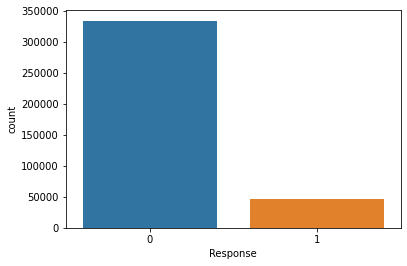

In [17]:
#Plot the count of the target variable
sns.countplot(data['Response'], data=data)

###We can see that data is highly unbalanced, indicating that only few people are interested in vehicle insurance

#Analyzing responses based on gender

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


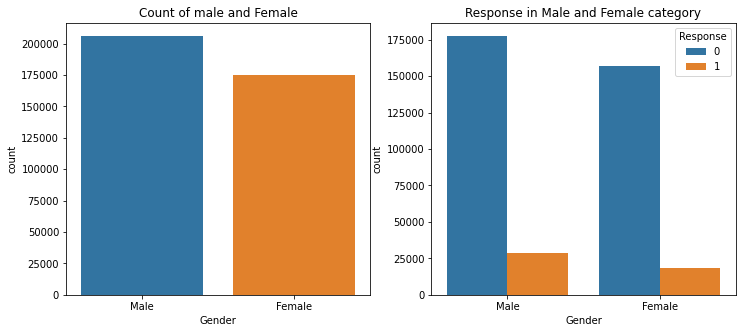

In [18]:
#Analyzing responses based on gender
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.countplot(data['Gender'])
plt.title('Count of male and Female')
plt.subplot(1,2,2)
sns.countplot(data['Gender'], hue= data['Response'])
plt.title('Response in Male and Female category')
plt.show()

*   Gender variable is almost equally distributed
*   We can see that males are more likely to purchase vehicle insurance.



#Age Vs Response

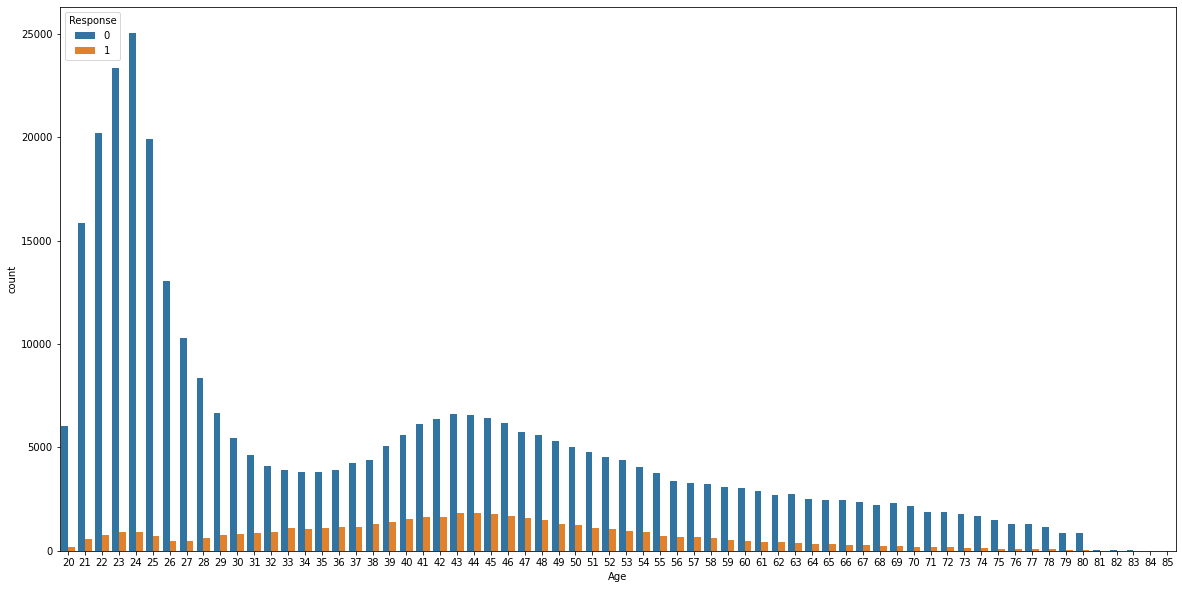

In [18]:
plt.figure(figsize = (20,10))
sns.countplot(x='Age', hue='Response', data=data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


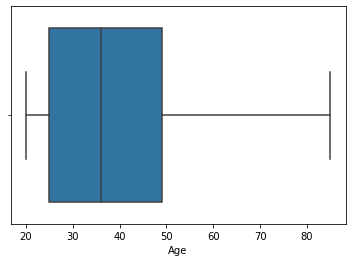

In [19]:
sns.boxplot(data['Age'])

*  We can see that Ages below 30 are not more interested in purchasing vehicle insurance may be because lack of experience and maturity levels.
*   People who are above 30-60 are more likely to be interested.
*   From boxplot we can see that there are no outliers in the data.

##Driving License Vs Response

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


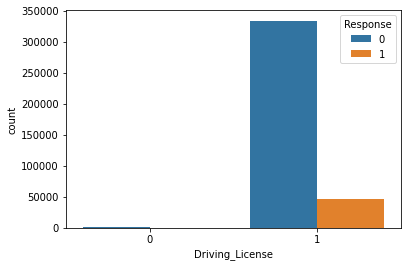

In [20]:
sns.countplot(data['Driving_License'], hue=data['Response'])

*   Customers who are interested in Vehicle insurance are almost having the driving license

#Previously Insured Vs Response

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


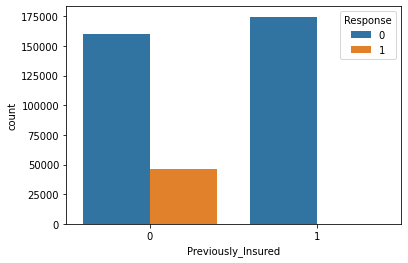

In [21]:
sns.countplot(data['Previously_Insured'], hue=data['Response'], data=data)

*   People who are not previously insured are most likely to be interested

#Vehicle age Vs Response

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


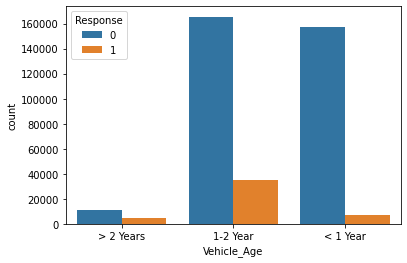

In [22]:
sns.countplot(data['Vehicle_Age'], hue= data['Response'], data=data)

Customers whose vehicle age is between 1-2 years are most likely to be interested when compared to the other two.

#Region code Vs Response

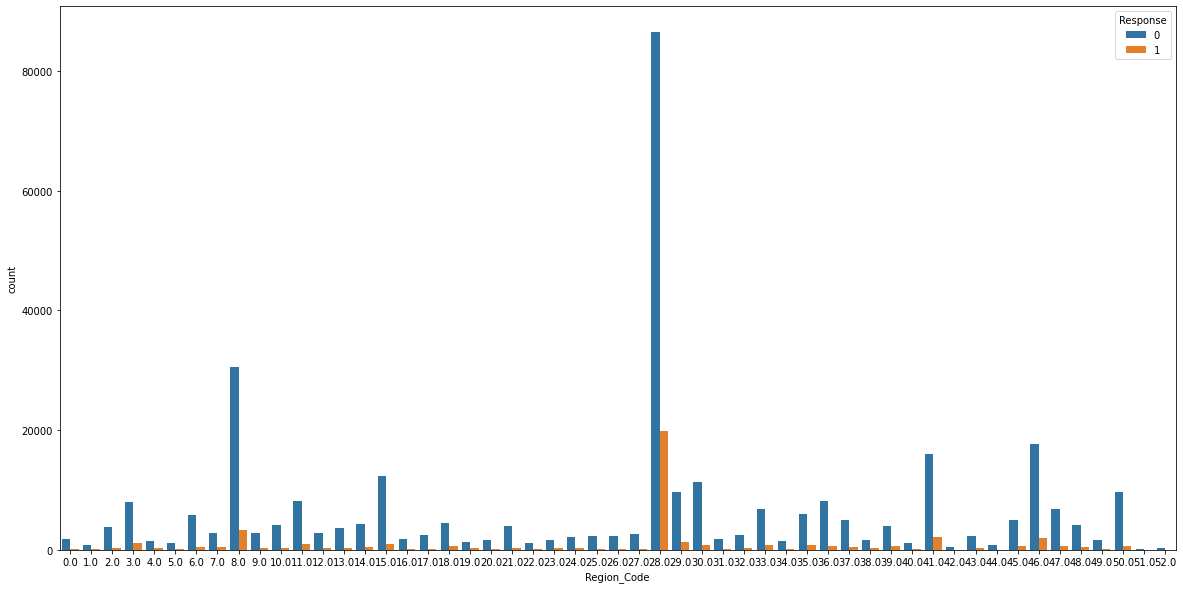

In [23]:
plt.figure(figsize = (20,10))
sns.countplot(x='Region_Code', hue='Response', data=data)

*   Region Code - 0.28 has more customers

#Lets check distribution of all features

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


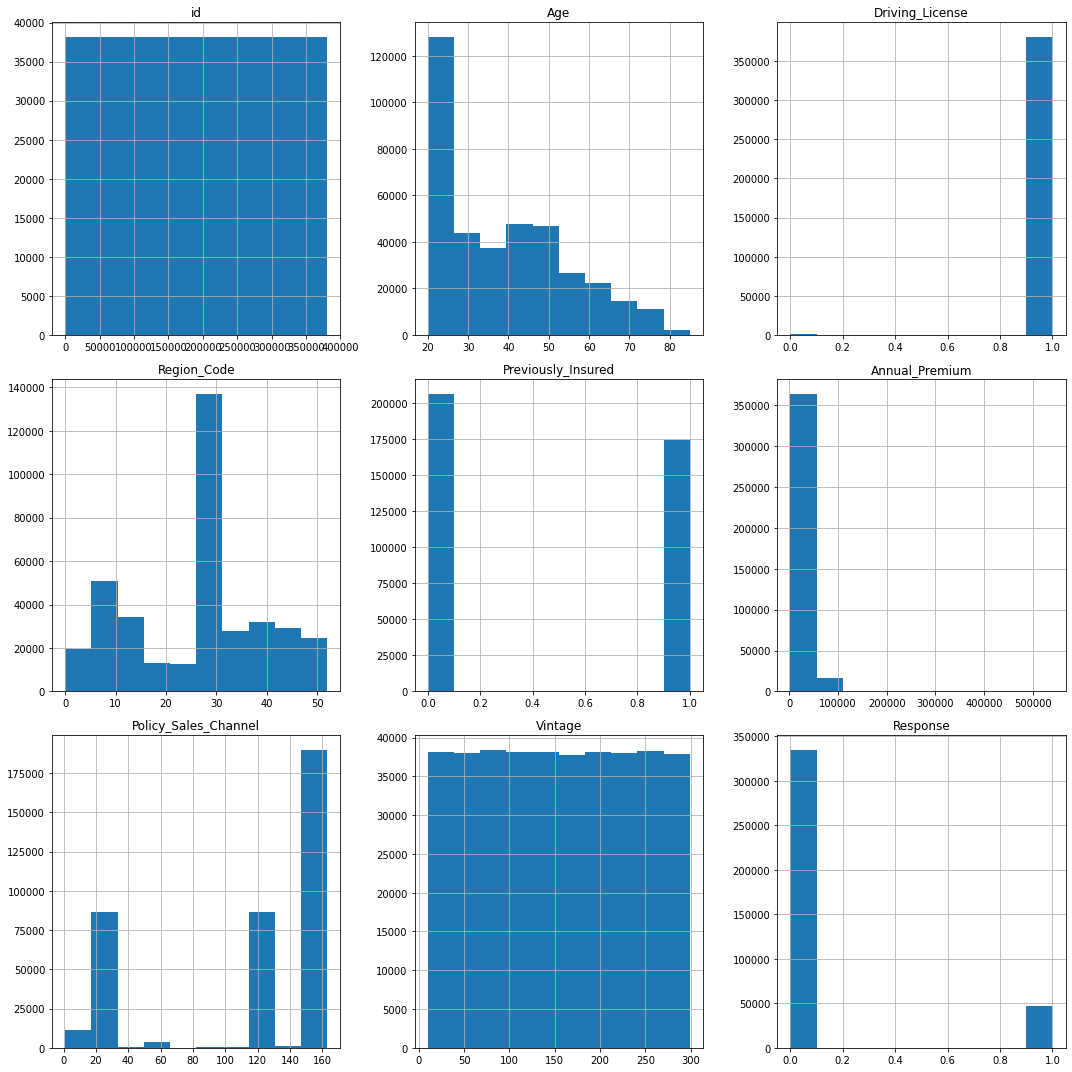

In [105]:
# Freq distribution of all data
fig, ax = plt.subplots(figsize=(15,15))
pd.DataFrame.hist(data=df,ax=ax)
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


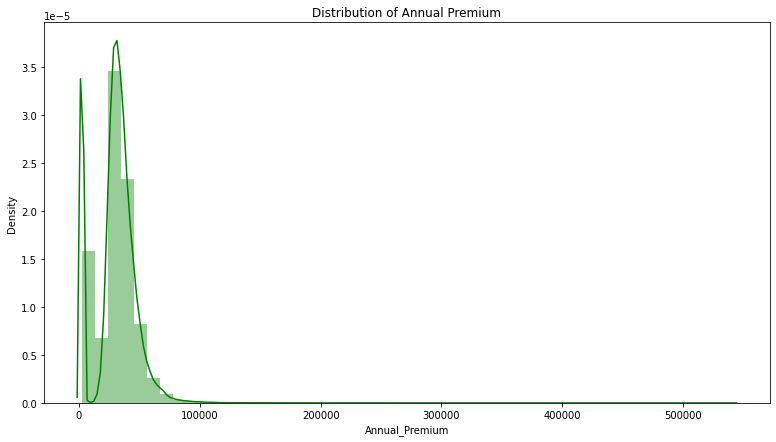

In [24]:
plt.figure(figsize=(13,7))
sns.distplot(data['Annual_Premium'],color='green')
plt.title('Distribution of Annual Premium')
plt.show()

*   From this plot we can see that the distribution of Annual premium is right skewed


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


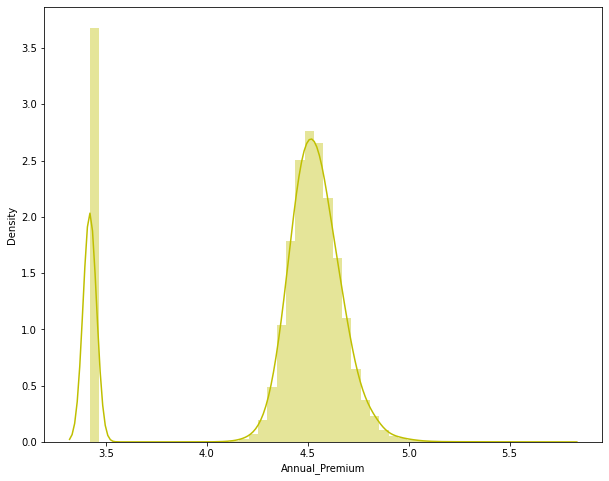

In [25]:
plt.figure(figsize = (10,8))
sns.distplot(np.log10(data['Annual_Premium']),color = 'y')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


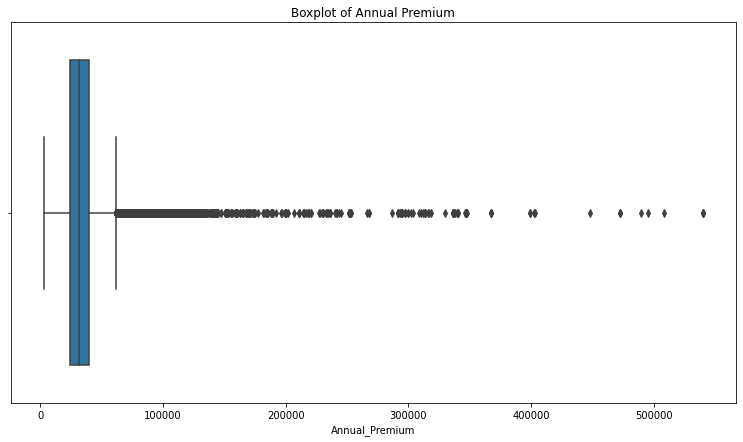

In [26]:
plt.figure(figsize=(13,7))
sns.boxplot(data['Annual_Premium'])
plt.title('Boxplot of Annual Premium')
plt.show()

We observe that there are lot of outliers in this variable

#Correlation Matrix

Text(0.5, 1.05, 'Pearson correlation of Features')

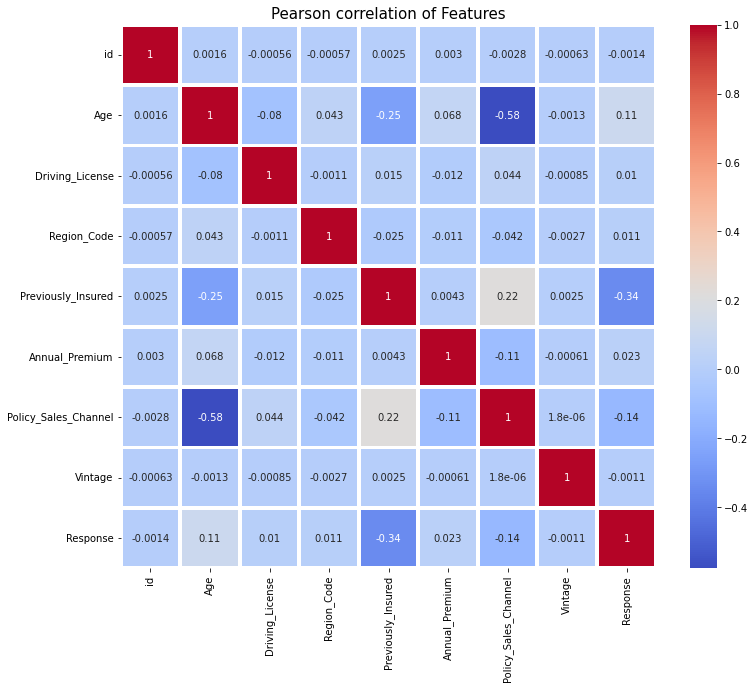

Vintage is not much correlated with target variable, so we can drop least correlated variable.

#Prepare Data

Label Encoding

In [50]:
from sklearn import preprocessing
from sklearn. preprocessing import LabelEncoder
#changing categorical value to numerical values
labelEncoder= LabelEncoder()
data['Vehicle_Age'] = labelEncoder.fit_transform(data['Vehicle_Age'])
data['Vehicle_Damage'] = labelEncoder.fit_transform(data['Vehicle_Damage'])

In [51]:
#One hot encoder on Gender
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc_data = pd.DataFrame(enc.fit_transform(df[['Gender']]).toarray())
names = enc.get_feature_names_out()
enc_data.columns = names
df1 = data.join(enc_data)

In [52]:
#Data after Encoding
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  int64  
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  int64  
 7   Vehicle_Damage        381109 non-null  int64  
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
 12  Gender_Female         381109 non-null  float64
 13  Gender_Male           381109 non-null  float64
dtypes: float64(5), int64(9)
memory usage: 40.7 MB


In [53]:
df1.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1,0.0,1.0
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0,0.0,1.0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1,0.0,1.0
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0,0.0,1.0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0,1.0,0.0


In [54]:
data.shape

(381109, 12)

In [55]:
duplicate = data[data.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [id, Gender, Age, Driving_License, Region_Code, Previously_Insured, Vehicle_Age, Vehicle_Damage, Annual_Premium, Policy_Sales_Channel, Vintage, Response]
Index: []


No Duplicates found in this dataset.

#Feature Selection

##Variance Threshold Removal

Using this method we can check which columns have constant values.[link text](https://)

In [56]:
from sklearn.feature_selection import VarianceThreshold

In [57]:
#Implementation Variance Threshold
variance_threshold = VarianceThreshold(threshold=0)
variance_threshold.fit(df1)
variance_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

##Feature Selection using f_classification

###Seperating Dependent and Independent Variables

In [58]:
#importing the libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [59]:
independent = df1.drop(['Response'], axis=1) #Contain all independent variables
dependent = df1['Response'] #Contain Dependent variable

In [60]:
#Finding scores of each feature
f_scores = f_classif(independent, dependent)
f_scores

(array([7.13370735e-01, 1.05091307e+03, 4.76694479e+03, 3.93066928e+01,
        4.25827356e+01, 5.02033540e+04, 4.17348459e+03, 5.47422454e+04,
        1.94317587e+02, 7.51301151e+03, 4.20468707e-01, 1.05091307e+03,
        1.05091307e+03]),
 array([3.98327606e-001, 3.18074235e-230, 0.00000000e+000, 3.62583444e-010,
        6.78391651e-011, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        3.72231514e-044, 0.00000000e+000, 5.16703652e-001, 3.18074235e-230,
        3.18074235e-230]))

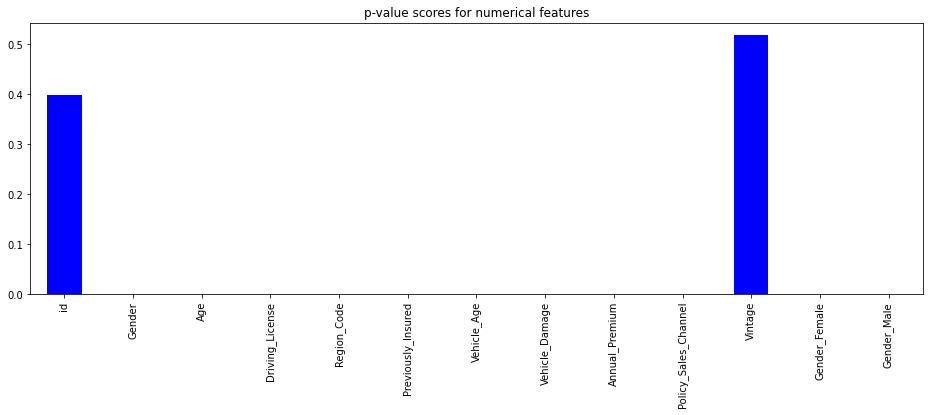

In [61]:
#The Second array consists of p-values that we need.
p_values = pd.Series(f_scores[1], index= independent.columns)
p_values.plot(kind='bar', color='blue', figsize=(16,5))
plt.title('p-value scores for numerical features')
plt.show()


We can drop Id and Vintage columns.

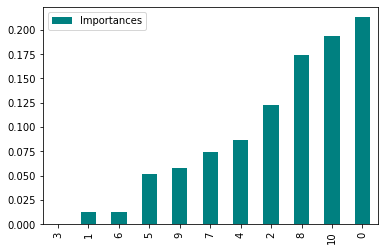

In [ ]:
#Checking Feature importance by using RandomForestClassifier


from sklearn.ensemble import RandomForestClassifier
# Create the random forest with hyperparameters
model= RandomForestClassifier(n_estimators=340)
# Fit the mmodel
model.fit(independent,dependent)
# get the importance of thr resulting features
importances= model.feature_importances_
# Create a data frame for visualization
final_df= pd.DataFrame({"Features": pd.DataFrame(independent).columns, "Importances": importances})
final_df.set_index('Importances')
# Sort in ascending order to better visualization
final_df= final_df.sort_values('Importances')
# Plot the feature importances in bars
final_df.plot.bar(color='teal')

*   We can see that Driving License and Gender has less importance, So we can drop these columns.

*   So after doing F_Classifier and RandomForestClassifier we can know that id,vintage,Driving_License,Gender are less important. So we can drop those columns.

In [62]:
df1.drop(['id','Gender','Vintage'],axis=1,inplace=True)

##Correlation Feature Selection

Text(0.5, 1.05, 'Pearson correlation of Features')

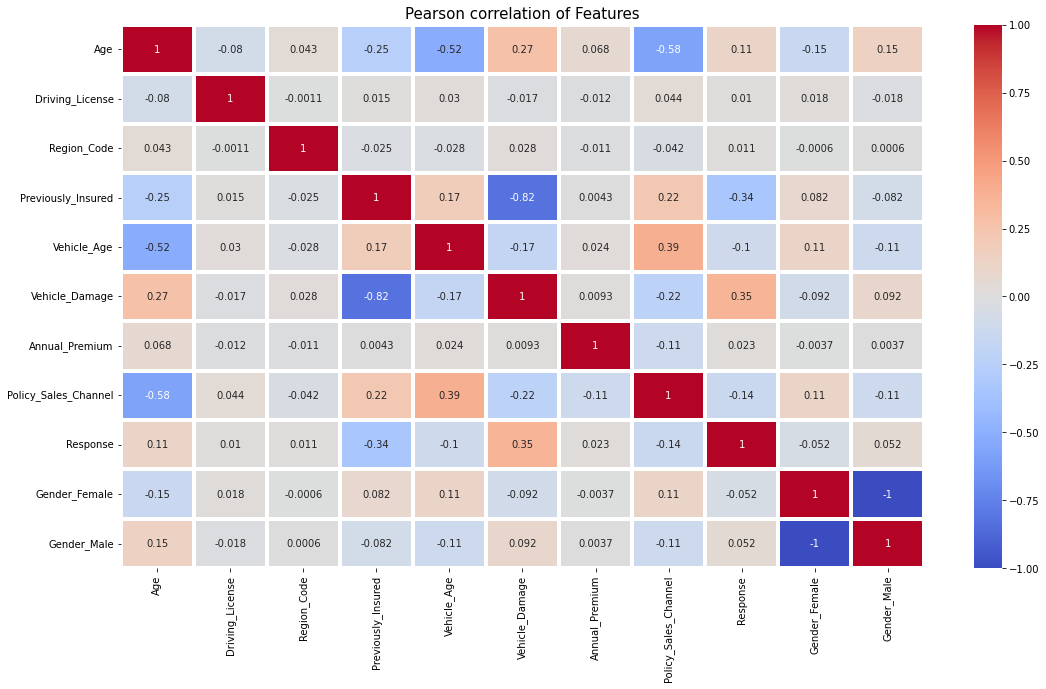

In [65]:
#Checking correlation of all the columns using heatmap
plt.figure(figsize = (18,10))
correlation = df1.corr()
sns.heatmap(correlation, annot= True,linewidths=3,cmap='coolwarm')
plt.title("Pearson correlation of Features", y=1.05, size=15)

Observations based on correlation plot:-

*  Gender_female and male 100% Multicollinearity we can remove any one feature among these 2
*  Previously insured, vehicle_age and vechicle_damage have high correlations with dependent variable
*  Vintage has verly less negative correlation with dependent variable

In [67]:
#Dropping gender female
df1.drop('Gender_Female',axis=1,inplace=True)

#Handling Imbalanced data

##Over Sampling Technique

In [68]:
# Class count
class_count_0, class_count_1 = df1['Response'].value_counts()

# Separate class
class_0 = df1[df1['Response'] == 0]
class_1 = df1[df1['Response'] == 1]
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (334399, 10)
class 1: (46710, 10)


In [69]:
class_1_over = class_1.sample(class_count_0, replace=True)
test_over = pd.concat([class_1_over, class_0], axis=0)

In [70]:
test_over['Response'].value_counts()

1    334399
0    334399
Name: Response, dtype: int64

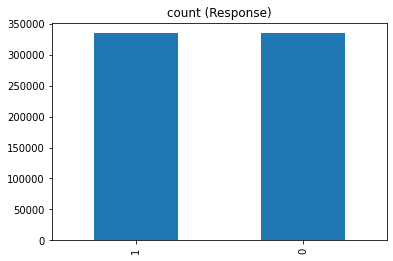

In [71]:
test_over['Response'].value_counts().plot(kind='bar', title='count (Response)')

#Split Train & Test data

In [72]:
#Splitting the data into train and test data

X = test_over.drop(['Response'], axis=1) #Contain all independent variables
y = test_over['Response'] 

In [73]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=.30,random_state=0)
print(Xtrain.shape,Xtest.shape,ytrain.shape,ytest.shape)

(468158, 9) (200640, 9) (468158,) (200640,)


In [74]:
ytrain = ytrain.values.reshape(-1,1)

In [75]:
ytest = ytest.values.reshape(-1,1)

In [76]:
ytrain.shape

(468158, 1)

In [77]:
ytest.shape

(200640, 1)

In [78]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [79]:
#Defining all these models
models = [
           ['LinearClassifier: ', Perceptron()],
           ['LogisticRegresseer:', LogisticRegression()],
           ['GNB: ', GaussianNB()],
           ['BNB: ', BernoulliNB()],
           ['KNeighborsClassifier: ', KNeighborsClassifier()],
           ['DecisionTreeClassifier: ', DecisionTreeClassifier()],
           ['RandomForestClassifier ',RandomForestClassifier()],
           ['GradientBoostingClassifier: ', GradientBoostingClassifier()] ,
           ['XGBRFClassifier: ', XGBRFClassifier()],
           ['AdaBoostClassifier: ',AdaBoostClassifier()],
           ['LgbmClassifier: ',ltb.LGBMClassifier()]
         ]

In [80]:
#store all the metrics values in data frame
model_data = []
for name,curr_model in models :
      curr_model_data = {}
      curr_model.random_state = 42
      curr_model_data["Name"] = name
      start = time.time()
      curr_model.fit(Xtrain,ytrain)
      end = time.time()
      y_train_pred=curr_model.predict(Xtrain)
      y_test_pred= curr_model.predict(Xtest)
      curr_model_data["Train_Time"] = end - start
      curr_model_data["Train accuracy"] =accuracy_score(ytrain,y_train_pred )
      curr_model_data["Test accuracy"] =accuracy_score(ytest, y_test_pred)
      curr_model_data["Train precision"] = precision_score(ytrain,y_train_pred)
      curr_model_data["Test precision"] = precision_score(ytest,y_test_pred)
      curr_model_data["Train recall"] = recall_score(ytrain,y_train_pred)
      curr_model_data["Test recall"] = recall_score(ytest,y_test_pred)
      curr_model_data["Train f1 score"] = f1_score(ytrain,y_train_pred)
      curr_model_data["Test f1 score"] = f1_score(ytest,y_test_pred)
      curr_model_data['Train ROC-AUC'] = roc_auc_score(ytrain,y_train_pred)
      curr_model_data["Test ROC-AUC"] = roc_auc_score(ytest,y_test_pred)
      model_data.append(curr_model_data)
 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [81]:
results = pd.DataFrame(model_data)
results

,Name,Train_Time,Train accuracy,Test accuracy,Train precision,Test precision,Train recall,Test recall,Train f1 score,Test f1 score,Train ROC-AUC,Test ROC-AUC
0,LinearClassifier:,0.764565,0.652190,0.651376,0.724767,0.724420,0.490842,0.488400,0.585297,0.583444,0.652205,0.651341
1,LogisticRegresseer:,1.436557,0.783943,0.784171,0.705187,0.705418,0.975921,0.975703,0.818754,0.818833,0.783925,0.784211
2,GNB:,0.128830,0.783947,0.784171,0.705191,0.705418,0.975921,0.975703,0.818757,0.818833,0.783930,0.784211
3,BNB:,0.181574,0.784222,0.783478,0.716334,0.715939,0.941192,0.939710,0.813511,0.812703,0.784208,0.783511
4,KNeighborsClassifier:,1.285159,0.893397,0.854167,0.833194,0.792435,0.983763,0.959631,0.902240,0.868056,0.893389,0.854189
5,DecisionTreeClassifier:,2.488254,0.986240,0.925807,0.976563,0.877897,0.996395,0.989162,0.986379,0.930214,0.986239,0.925821
6,RandomForestClassifier,73.728769,0.986225,0.925892,0.975758,0.877075,0.997228,0.990588,0.986376,0.930382,0.986224,0.925906
7,GradientBoostingClassifier:,56.619468,0.798589,0.797234,0.737892,0.736936,0.926220,0.924346,0.821399,0.820070,0.798578,0.797260
8,XGBRFClassifier:,16.185996,0.789883,0.789294,0.713983,0.713629,0.967296,0.966241,0.821557,0.820942,0.789867,0.789331
9,AdaBoostClassifier:,18.032935,0.796686,0.796137,0.731668,0.731268,0.937070,0.936251,0.821728,0.821160,0.796674,0.796167


*   From the above DataFrame, we can say that the top models are **Random Forest Classifier with 0.98 Train accuracy and 0.92 Test accuracy.**


#Let's consider Random Forest Classifier as the top model and perform Feature selection and Hyper parameter tuning to get more accuracy

#Model Selection

In [83]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier()
randomforest = randomforest.fit(Xtrain, ytrain)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [84]:
train_pred = randomforest.predict(Xtrain)

In [85]:
test_pred = randomforest.predict(Xtest)

In [86]:
#Confusion matrices for train and test
print(confusion_matrix(ytrain,train_pred))
print(confusion_matrix(ytest,test_pred))

[[228219   5839]
 [   609 233491]]
[[86370 13971]
 [  911 99388]]


In [87]:
#Print the classification report for train and test
print(classification_report(ytrain,train_pred))
print("/n")
print(classification_report(ytest, test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    234058
           1       0.98      1.00      0.99    234100

    accuracy                           0.99    468158
   macro avg       0.99      0.99      0.99    468158
weighted avg       0.99      0.99      0.99    468158

/n
              precision    recall  f1-score   support

           0       0.99      0.86      0.92    100341
           1       0.88      0.99      0.93    100299

    accuracy                           0.93    200640
   macro avg       0.93      0.93      0.93    200640
weighted avg       0.93      0.93      0.93    200640



#Hyperparameter Tuning

In [88]:
rf = RandomForestClassifier(random_state=42)
#Cross validation and hyperparameter tuning
rf_bayes = BayesSearchCV(estimator= rf,
                         search_spaces = {
                          'max_depth':Integer(2,15) ,
                          'min_samples_leaf': Integer(1,30),
                          'min_samples_split': Integer(2,30),
                          'n_estimators': Integer(1,140)
                        },
                       cv = 5, verbose=2, scoring='accuracy', n_iter=10)

rf_bayes.fit(Xtrain,ytrain)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=16, n_estimators=77; total time=  32.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=16, n_estimators=77; total time=  35.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=16, n_estimators=77; total time=  34.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=16, n_estimators=77; total time=  37.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=16, n_estimators=77; total time=  39.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=15, min_samples_split=29, n_estimators=43; total time=  13.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=15, min_samples_split=29, n_estimators=43; total time=  13.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=15, min_samples_split=29, n_estimators=43; total time=  13.9s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=15, min_samples_split=29, n_estimators=43; total time=  13.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=15, min_samples_split=29, n_estimators=43; total time=  13.7s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=13, min_samples_leaf=21, min_samples_split=22, n_estimators=118; total time=  59.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=13, min_samples_leaf=21, min_samples_split=22, n_estimators=118; total time= 1.0min


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=13, min_samples_leaf=21, min_samples_split=22, n_estimators=118; total time= 1.0min


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=13, min_samples_leaf=21, min_samples_split=22, n_estimators=118; total time= 1.0min


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=13, min_samples_leaf=21, min_samples_split=22, n_estimators=118; total time= 1.1min
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=8, min_samples_leaf=22, min_samples_split=18, n_estimators=73; total time=  29.9s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=8, min_samples_leaf=22, min_samples_split=18, n_estimators=73; total time=  29.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=8, min_samples_leaf=22, min_samples_split=18, n_estimators=73; total time=  28.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=8, min_samples_leaf=22, min_samples_split=18, n_estimators=73; total time=  28.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=8, min_samples_leaf=22, min_samples_split=18, n_estimators=73; total time=  26.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=13, min_samples_split=16, n_estimators=21; total time=   6.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=13, min_samples_split=16, n_estimators=21; total time=   6.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=13, min_samples_split=16, n_estimators=21; total time=   7.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=13, min_samples_split=16, n_estimators=21; total time=   7.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, min_samples_leaf=13, min_samples_split=16, n_estimators=21; total time=   7.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=20, min_samples_split=21, n_estimators=126; total time=  58.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=20, min_samples_split=21, n_estimators=126; total time=  58.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=20, min_samples_split=21, n_estimators=126; total time= 1.0min


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=20, min_samples_split=21, n_estimators=126; total time= 1.0min


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=11, min_samples_leaf=20, min_samples_split=21, n_estimators=126; total time=  58.5s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=8, min_samples_leaf=18, min_samples_split=6, n_estimators=74; total time=  26.9s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=8, min_samples_leaf=18, min_samples_split=6, n_estimators=74; total time=  24.9s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=8, min_samples_leaf=18, min_samples_split=6, n_estimators=74; total time=  24.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=8, min_samples_leaf=18, min_samples_split=6, n_estimators=74; total time=  24.9s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=8, min_samples_leaf=18, min_samples_split=6, n_estimators=74; total time=  25.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=8, min_samples_split=18, n_estimators=2; total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=8, min_samples_split=18, n_estimators=2; total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=8, min_samples_split=18, n_estimators=2; total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=8, min_samples_split=18, n_estimators=2; total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=8, min_samples_split=18, n_estimators=2; total time=   1.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=15, n_estimators=75; total time=  13.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=15, n_estimators=75; total time=  13.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=15, n_estimators=75; total time=  13.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=15, n_estimators=75; total time=  13.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=15, n_estimators=75; total time=  13.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=29, min_samples_split=11, n_estimators=102; total time=  48.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=29, min_samples_split=11, n_estimators=102; total time=  47.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=29, min_samples_split=11, n_estimators=102; total time=  47.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=29, min_samples_split=11, n_estimators=102; total time=  48.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=14, min_samples_leaf=29, min_samples_split=11, n_estimators=102; total time=  46.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


BayesSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
              n_iter=10, scoring='accuracy',
              search_spaces={'max_depth': Integer(low=2, high=15, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=1, high=30, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=2, high=30, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=1, high=140, prior='uniform', transform='normalize')},
              verbose=2)

In [89]:
rf_bayes.best_params_

OrderedDict([('max_depth', 14),
             ('min_samples_leaf', 8),
             ('min_samples_split', 18),
             ('n_estimators', 2)])

In [90]:
rf_bayes.best_estimator_

RandomForestClassifier(max_depth=14, min_samples_leaf=8, min_samples_split=18,
                       n_estimators=2, random_state=42)

In [91]:
#make prediction
train_pred=rf_bayes.best_estimator_.predict(Xtrain)
test_pred=rf_bayes.best_estimator_.predict(Xtest)

In [92]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(ytrain, train_pred)
test_accuracy = accuracy_score(ytest, test_pred)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.810809598468893
The accuracy on test dataset is 0.8055721690590112


In [93]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(ytrain, train_pred)
test_cm = confusion_matrix(ytest, test_pred)

In [94]:
train_cm
test_cm

array([[68262, 32079],
       [ 6931, 93368]])

In [95]:
# Print the classification report for train and test
print(classification_report(ytrain,train_pred))
print("\n")
print(classification_report(ytest,test_pred))

              precision    recall  f1-score   support

           0       0.91      0.69      0.78    234058
           1       0.75      0.94      0.83    234100

    accuracy                           0.81    468158
   macro avg       0.83      0.81      0.81    468158
weighted avg       0.83      0.81      0.81    468158



              precision    recall  f1-score   support

           0       0.91      0.68      0.78    100341
           1       0.74      0.93      0.83    100299

    accuracy                           0.81    200640
   macro avg       0.83      0.81      0.80    200640
weighted avg       0.83      0.81      0.80    200640



#Roc curve for Train data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


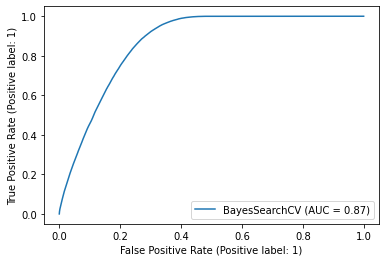

In [109]:
metrics.plot_roc_curve(rf_bayes, Xtrain, ytrain) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


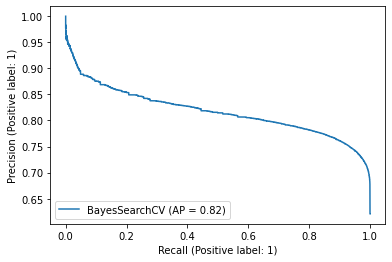

In [97]:
metrics.plot_precision_recall_curve(rf_bayes, Xtrain, ytrain)

#Roc Curve for Test data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


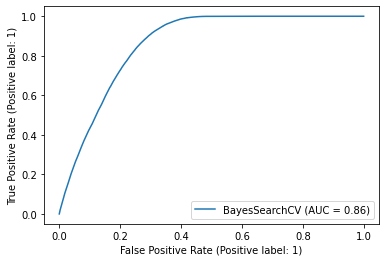

In [103]:
metrics.plot_roc_curve(rf_bayes, Xtest, ytest)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


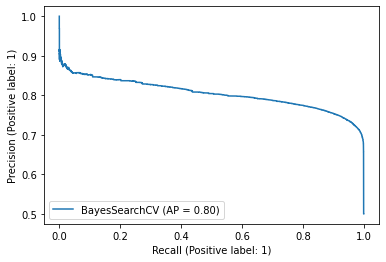

In [112]:
metrics.plot_precision_recall_curve(rf_bayes, Xtest, ytest)

The ML model for the problem statement was created using python with the help of the dataset, and the ML model created with Random Forest and Decision tree models performed better than other models.

#Conclusion:



*   Customers of age between 30 to 60 are more likely to buy insurance.

*   Customers with Vehicle_Damage are likely to buy insurance.

*   Customers with Driving License have higher chance of buying Insurance.

*   The variable such as Age, Previously_insured,Annual_premium are more afecting the target variable.

*   Comparing ROC curve we can see that Random Forest model preform better. Because curves closer to the top-left corner, it indicate a better performance.


